In [1]:
import numpy as np
import cv2

def boundary_of_label_map(map):

    map = map.copy()

    kernel = np.ones((3, 3), np.uint8)
    erosion = cv2.erode(map.astype(np.uint16), kernel, iterations=1)
    dilation = cv2.dilate(map.astype(np.uint16), kernel, iterations=1)
    boundary = np.not_equal(erosion, dilation)
    return boundary

def distance_map(map, normalize=False):

    map = map.copy()
    boundary = boundary_of_label_map(map)
    map = np.multiply(map, 1-boundary)

    dist_map = cv2.distanceTransform((map>0).astype(np.uint8), cv2.DIST_L2, cv2.DIST_MASK_PRECISE)

    if normalize:
        unique = np.unique(map)
        for u in unique:
            if u == 0:
                continue
            max_dist = np.max(dist_map[map==u])
            if max_dist != 0:
                dist_map[map == u] = dist_map[map == u]/max_dist
    return dist_map

In [2]:
from skimage import io as ski_io

im = ski_io.imread('E:/CVPPP2017_LSC_training/images/A1/plant002_label.png')
im = cv2.cvtColor(im, cv2.COLOR_RGBA2GRAY)
im = im.copy()

dist = distance_map(im, normalize=False)

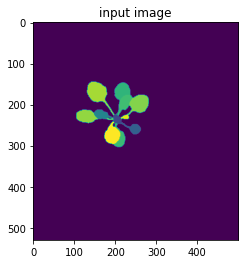

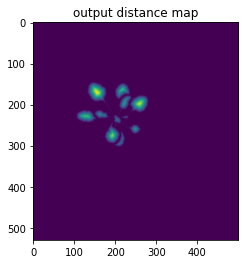

In [3]:
import matplotlib.pyplot as plt

plt.imshow(im)
plt.title('input image')
plt.show()
plt.imshow(dist)
plt.title('output distance map')
plt.show()